In [51]:
##Fake bank Note Prediction

In [52]:
import pandas as pd

In [3]:
data = pd.read_csv('bank_note_data.csv')

In [15]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

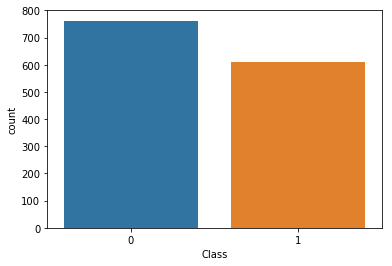

In [7]:
sns.countplot(x='Class',data=data)

In [9]:
##Data Preparation

In [10]:
##Standard Scaling of Datasets

In [18]:
#Import standard Scalar from Scikit learn
from sklearn.preprocessing import StandardScaler

In [19]:
##Create Scalar Object
scaler = StandardScaler()

In [20]:
#Fit Scalar to the features
scaler.fit(data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
#Transform the features to a scaled version
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

In [17]:
scaled_features

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ..., 
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [22]:
df_features = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_features.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [23]:
##Train Test Split

In [28]:
X = df_features

In [29]:
type(X)

pandas.core.frame.DataFrame

In [25]:
y = data['Class']

In [27]:
type(y)

pandas.core.series.Series

In [30]:
#Here we need to convert X and Y to Numpy array form instead of pandas series or Dataframes

In [31]:
X = X.as_matrix()
y = y.as_matrix()

In [33]:
##Creating training and test sets
from sklearn.cross_validation import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
import tensorflow.contrib.learn as skflow

In [38]:
from tensorflow.contrib.learn import SKCompat

In [40]:
feature_columns = skflow.infer_real_valued_columns_from_input(X)

In [41]:
classifier = SKCompat(skflow.DNNClassifier(hidden_units=[10,20,10],n_classes=3,feature_columns=feature_columns))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fde3a4e8a58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpu4vigd6m'}


In [43]:
classifier.fit(X_train,y_train,steps=200,batch_size=20)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpu4vigd6m/model.ckpt.
INFO:tensorflow:loss = 1.14198, step = 1
INFO:tensorflow:global_step/sec: 278.101
INFO:tensorflow:loss = 0.0231959, step = 101 (0.363 sec)
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmpu4vigd6m/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00516955.


SKCompat()

In [44]:
##Model Evaluation

In [45]:
notes_predictions = classifier.predict(X_test)

INFO:tensorflow:Restoring parameters from /tmp/tmpu4vigd6m/model.ckpt-200


In [47]:
notes_predictions['classes']

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1,

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_test,notes_predictions['classes']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       229
          1       0.99      0.99      0.99       183

avg / total       1.00      1.00      1.00       412

